# Derivation of the potential and evaluation for different parameters

## Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import sympy as sp
from sympy import init_printing, latex
from IPython.display import display, Math
from matplotlib.colors import SymLogNorm
import pandas as pd


## Definition of the field

In [11]:
X1, X2 = sp.symbols('X1 X2')
tau, phi_p, phi_pp, phi_ppp, s0, c,g, phi_Ip = sp.symbols('tau phi_p phi_pp phi_ppp s0 c g phi_Ip')
I_L, I_C, I_R, s_L, s_C, s_R, R = sp.symbols('I_L I_C I_R s_L s_C s_R R')
x = sp.symbols('x', real=True)
R_I, I0, I_I = sp.symbols('R_I I0 I_I', real=True)


F1 = (
    (phi_p/2)*(I_L - I_C + X1*(s_L+s_C) + (R+X2)*(s_L-s_C)) +
    (s0*phi_pp/2)*(
         R*(s_L+s_C) + I_L + I_C + (2*(s0-c*g*phi_Ip))/(3*c*g*phi_Ip)*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X1 +
    (s0*phi_pp/2)*(R*(s_L-s_C) + I_L - I_C)*X2 +
    s0**2 * phi_pp * X1*X2 +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X1*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X1*(X1**2+3*X2**2)
)

F2 = (
    (phi_p/6)*(X1*(s_L-s_C) + X2*(s_L+s_C+4*s_R) + I_L + I_C - 2*I_R + R*(s_L+s_C-2*s_R)) +
    (s0*phi_pp/6)*(
         R*(s_L+s_C+4*s_R) + (I_L+I_C+4*I_R) + ((s0-c*g*phi_Ip)/(2*c*g*phi_Ip))*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X2 +
    (s0*phi_pp/6)*(R*(s_L-s_C) + I_L - I_C)*X1 +
    (s0**2 * phi_pp/6)*(X1**2-3*X2**2) +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X2*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X2*(X1**2+3*X2**2)
)

F1_potential = -F1
F2_potential = -3*F2


We verify that the curl of the field is 0 in order to prove that there there exists a potential that meets our requirements

In [12]:
curl = sp.simplify(sp.diff(F2_potential, X1) - sp.diff(F1_potential, X2))
print("Curl of the field:", curl)

Curl of the field: 0


## Computation of the potential

In [13]:
U = sp.integrate(F1_potential, X1)
U += sp.integrate(F2_potential - sp.diff(U, X2), X2)

U = sp.simplify(U)

print("Potential U:")
U
# print("\nForma LaTeX:")
# print(sp.latex(U_simpl))

Potential U:


(X1**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) + 2*X1**2*(-I_C*c*g*phi_Ip*phi_pp*s0 - 2*I_C*phi_pp*s0**2 - I_L*c*g*phi_Ip*phi_pp*s0 - 2*I_L*phi_pp*s0**2 + 2*I_R*c*g*phi_Ip*phi_pp*s0 - 2*I_R*phi_pp*s0**2 - R*c*g*phi_Ip*phi_pp*s0*s_C - R*c*g*phi_Ip*phi_pp*s0*s_L + 2*R*c*g*phi_Ip*phi_pp*s0*s_R - 2*R*phi_pp*s0**2*s_C - 2*R*phi_pp*s0**2*s_L - 2*R*phi_pp*s0**2*s_R + 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 - 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 - 6*X2**2*phi_pp**2*s0**4 - 6*X2*c*g*phi_Ip*phi_pp*s0**2 - 3*c*g*phi_Ip*phi_p*s_C - 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) - 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L 

## Evaluating for a given set of parameters

In [14]:
s0_val = 1
IL_val, IC_val, IR_val = 1,1,1
sL_val, sC_val, sR_val = 0,0,0
c_val = 1        
g_val = 1  
I_I_val = 1/3

We first define our non-linear function $\phi$ and its derivatives evaluated at the points $X_0$, $X_I$

In [15]:
phi = sp.Piecewise(
    (0, x < 0),
    (x**2, sp.And(x >= 0, x <= 1)),
    (2*sp.sqrt(x) - sp.Rational(3, 4), x > 1)
)

phi_prime = sp.diff(phi, x)
phi_double_prime = sp.diff(phi_prime, x)
phi_triple_prime = sp.diff(phi_double_prime, x)

X0 = s0*R - c*R_I + I0
X0_I = g*R+I_I

phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_double_prime_X0 = sp.simplify(phi_double_prime.subs(x, X0))
phi_triple_prime_X0 = sp.simplify(phi_triple_prime.subs(x, X0))

phi_I = sp.simplify(phi.subs(x, X0_I))
phi_I_prime = sp.simplify(phi_prime.subs(x, X0_I))

Now we compute the values of $R, R_I$ and $I_0$ for the given set of parameters

In [16]:
eq1 = s0*phi_prime_X0-1
eq2 = R - phi_X0 
eq3 = R_I - phi_I
eq1 = eq1.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq2 = eq2.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq3 = eq3.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq = sp.lambdify(
    (R, R_I, I0),
    (eq1, eq2, eq3),
    'numpy'
)

def fun(vars):
    R_val, R_I_val, I0_val = vars
    return eq(R_val, R_I_val, I0_val)

x0 = [1/4, 1/4, 1/2]
R_val, R_I_val, I0_val = fsolve(fun, x0)

print("Values of R, R_I, I0:")
print(f"R = {R_val}, R_I = {R_I_val}, I0 = {I0_val}")

Values of R, R_I, I0:
R = 0.25, R_I = 0.34027777777777735, I0 = 0.5902777777777773


Substituting the parameters we obtain the expression of the potential:

In [17]:
phi_p_val = sp.N(phi_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val,I0: I0_val, c: c_val}))
phi_pp_val = sp.N(phi_double_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_ppp_val = sp.N(phi_triple_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_Ip_val = sp.N(phi_I_prime.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val, g: g_val, I_I: I_I_val}))

subs_dict = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_Ip_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('I_L'): IL_val,
    sp.symbols('I_C'): IC_val,
    sp.symbols('I_R'): IR_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,
    sp.symbols('R_I'): R_I_val,
}


potential= sp.N(U.subs(subs_dict))
display(Math(r"U = " + latex(potential)))
potential_num = sp.lambdify((sp.symbols('X1'), sp.symbols('X2')), potential, 'numpy')

<IPython.core.display.Math object>

## Exporting to a file

We export to the files _exprs.pkl_, _U.pkl_, _phis.pkl_ the expressions of our field, potential and $\phi$.

In [18]:
import pickle
exprs = {'F1': F1, 'F2': F2}
phis = {'phi':phi, 'phi_X0':phi_X0, 'phi_X0_p': phi_prime_X0, 'phi_X0_pp': phi_double_prime_X0, 'phi_X0_ppp': phi_triple_prime_X0, 'phi_I':phi_I ,'phi_Ip': phi_I_prime}
with open('exprs.pkl', 'wb') as f:
    pickle.dump(exprs, f)

with open('U.pkl', 'wb') as f:
    pickle.dump(U, f)

with open('phis.pkl', 'wb') as f:
    pickle.dump(phis, f)

## Plotting the potential

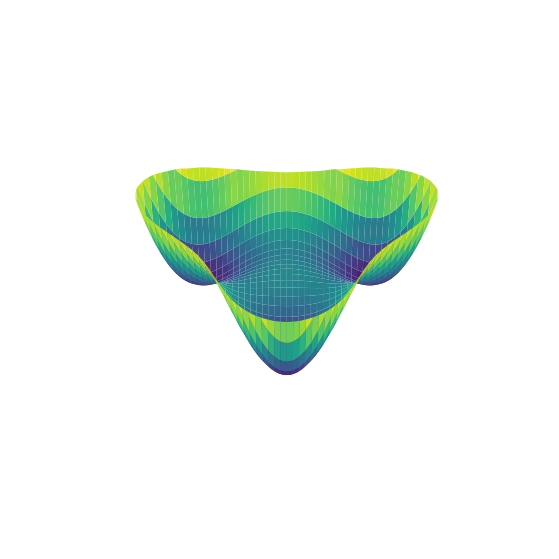

In [73]:
x_vals = np.linspace(-7, 7, 4000)
y_vals = np.linspace(-7, 7, 4000)
X, Y = np.meshgrid(x_vals, y_vals)

Z = potential_num(X, Y)

# Create a mask for the values outside our desired range
mask = (Z < -40) | (Z > 20)
Z_masked = np.ma.masked_array(Z, mask)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_masked, cmap='viridis', alpha=1, antialiased=True)

# plt.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=70, azim = -90)


# caption = (
#     f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, "
#     f"\\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, "
#     f"I_R={IR_val:.1f}, s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$"
# )
# ax.text2D(-0.01, -0.05, 
#           f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, \\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, I_R={IR_val:.1f}$\n"
#           f"                         $s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$",
#           transform=ax.transAxes, fontsize=10, verticalalignment='top')

# ax.set_xlabel('$X_1$')
# ax.set_ylabel('$X_2$')
# ax.set_zlabel('$\\psi(X_1,X_2)$')
# ax.set_title('Potential $\\psi(X_1,X_2)$')
ax.grid(False)       # quita la rejilla de los ejes
ax.set_axis_off()   
# Save the figure with transparent background
plt.savefig('potencial2.png', dpi=600, transparent=True)
plt.show()

## Studying the equilibrium points

### Numerically

In [11]:
F1_num_expr = sp.N(F1_potential.subs(subs_dict))
F2_num_expr = sp.N(F2_potential.subs(subs_dict))

grad_func = sp.lambdify((X1, X2), [F1_num_expr, F2_num_expr], 'numpy')

def grad_wrapper(x):
    return np.array(grad_func(x[0], x[1])).astype(float)

x_guess = np.linspace(-5, 5, 10)
y_guess = np.linspace(-5, 5, 10)
initial_guesses = np.array(np.meshgrid(x_guess, y_guess)).T.reshape(-1, 2)

critical_points_fsolve = []
for guess in initial_guesses:
    sol = fsolve(grad_wrapper, guess)
    sol_rounded = np.round(sol, decimals=6) 
    if not any(np.allclose(sol_rounded, cp) for cp in critical_points_fsolve):
        critical_points_fsolve.append(sol_rounded)

In [12]:
Hessian = sp.hessian(U, (X1, X2))

point_coords = []
potential_vals = []
eigenvalue1 = []
eigenvalue2 = []
point_types = []

for cp in critical_points_fsolve:
    H_cp = Hessian.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    eigenvals_dict = H_cp.eigenvals()
    eigenvals_list = list(eigenvals_dict.keys())
    
    U_val = float(U.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict))
    
    if all(val > 0 for val in eigenvals_list):
        point_type = "Minimum"
    elif all(val < 0 for val in eigenvals_list):
        point_type = "Maximum"
    else:
        point_type = "Saddle Point"
    
    point_coords.append(f"({cp[0]:.4f}, {cp[1]:.4f})")
    potential_vals.append(U_val)
    eigenvalue1.append(float(eigenvals_list[0]))
    if len(eigenvals_list) > 1:
        eigenvalue2.append(float(eigenvals_list[1]))
    else:
        eigenvalue2.append(float(eigenvals_list[0]))
    point_types.append(point_type)

critical_points = pd.DataFrame({
    'Critical Point': point_coords,
    'Potential Value': potential_vals,
    'Eigenvalue 1': eigenvalue1,
    'Eigenvalue 2': eigenvalue2,
    'Type': point_types
})

display(critical_points)


,Critical Point,Potential Value,Eigenvalue 1,Eigenvalue 2,Type
0,"(-0.0000, -2.9099)",-18.406867,8.943846,20.300996,Minimum
1,"(-1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point
2,"(-4.2322, 1.4469)",-16.426684,6.698639,24.023007,Minimum
3,"(0.0000, 1.1599)",-1.555744,-3.265272,8.091878,Saddle Point
4,"(4.2322, 1.4469)",-16.426684,6.698639,24.023007,Minimum
5,"(0.0000, 0.0000)",0.000000,-1.714286,-5.785714,Maximum
6,"(1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point


### Symbolic

In [13]:
critical_points_sym = sp.solve([F1_potential.subs(subs_dict), F2_potential.subs(subs_dict)], (X1, X2), dict=True)
Hessian = sp.hessian(U, (X1, X2))

point_coords = []
potential_vals = []
eigenvalue1 = []
eigenvalue2 = []
point_types = []

for cp in critical_points_sym:
    H_cp = Hessian.subs(cp).subs(subs_dict)
    eigenvals = list(H_cp.eigenvals().keys())
    U_val = U.subs(cp).subs(subs_dict)
    U_val = float(potential.subs({X1: cp[X1], X2: cp[X2]}))
    
    if all(val > 0 for val in eigenvals):
        point_type = "Minimum"
    elif all(val < 0 for val in eigenvals):
        point_type = "Maximum"
    else:
        point_type = "Saddle Point"
    
    point_coords.append(f"({cp[X1]:.4f}, {cp[X2]:.4f})")
    potential_vals.append(U_val)
    eigenvalue1.append(float(eigenvals[0]))
    if len(eigenvals) > 1:
        eigenvalue2.append(float(eigenvals[1]))
    else:
        eigenvalue2.append(float(eigenvals[0]))
    point_types.append(point_type)

critical_points = pd.DataFrame({
    'Critical Point': point_coords,
    'Potential Value': potential_vals,
    'Eigenvalue 1': eigenvalue1,
    'Eigenvalue 2': eigenvalue2,
    'Type': point_types
})

display(critical_points)

,Critical Point,Potential Value,Eigenvalue 1,Eigenvalue 2,Type
0,"(-4.2322, 1.4469)",-16.426684,6.698637,24.023014,Minimum
1,"(-1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point
2,"(0.0000, -2.9099)",-18.406867,8.943843,20.300986,Minimum
3,"(0.0000, 0.0000)",0.000000,-1.714286,-5.785714,Maximum
4,"(0.0000, 1.1599)",-1.555744,-3.265272,8.091871,Saddle Point
5,"(1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point
6,"(4.2322, 1.4469)",-16.426684,6.698637,24.023014,Minimum


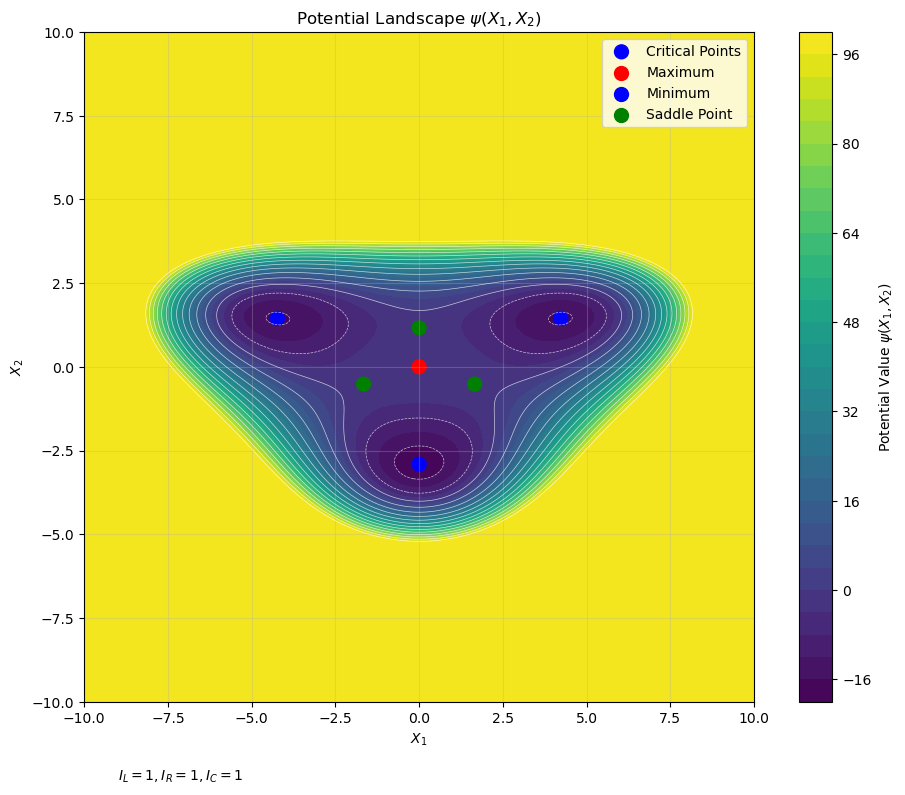

In [14]:
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

Z = potential_num(X, Y)
Z = np.clip(Z, -50, 100)

fig, ax = plt.subplots(figsize=(10, 8))

contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

x_coords = []
y_coords = []
point_types = []

for i, row in critical_points.iterrows():
	coord_str = row['Critical Point']
	coords = coord_str.strip('()').split(',')
	x_coords.append(float(coords[0]))
	y_coords.append(float(coords[1]))
	point_types.append(row['Type'])

colors = {'Maximum': 'red', 'Minimum': 'blue', 'Saddle Point': 'green'}
point_colors = [colors[t] for t in point_types]
ax.scatter(x_coords, y_coords, c=point_colors, s=100, marker='o', label='Critical Points')

for point_type, color in colors.items():
	ax.scatter([], [], c=color, label=point_type, s=100, marker='o')

cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

ax.set_xlabel('$X_1$')
text_IL_IR_IC = f"$I_L={IL_val}, I_R={IR_val}, I_C={IC_val}$"
ax.text(0.05, -0.1, text_IL_IR_IC, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()
ax.grid(linestyle='-', alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=600)
plt.show()

## Finding the basins of attraction

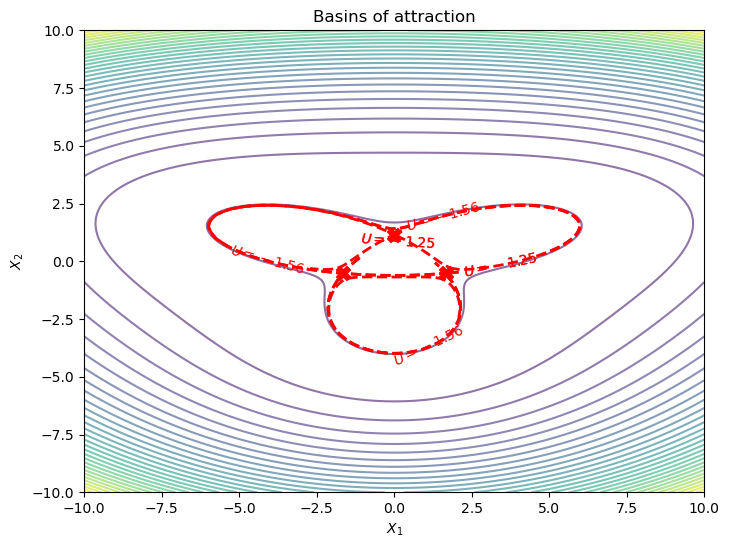

In [15]:
saddle_points = critical_points[critical_points['Type'] == 'Saddle Point']

saddle_vals = []
for _, row in saddle_points.iterrows():
    xs, ys = map(float, row['Critical Point'].strip('()').split(','))
    E_s  = potential_num(xs, ys)
    saddle_vals.append((xs, ys, E_s))

xs_vals = [sv[0] for sv in saddle_vals]
ys_vals = [sv[1] for sv in saddle_vals]

x_min, x_max = [-10,10]
y_min, y_max = [-10,10]

x_lin = np.linspace(x_min, x_max, 400)
y_lin = np.linspace(y_min, y_max, 400)
Xg, Yg = np.meshgrid(x_lin, y_lin)
Ug      = potential_num(Xg, Yg)


plt.figure(figsize=(8,6))
plt.contour(Xg, Yg, Ug, levels=30, cmap='viridis', alpha=0.6)

for xs, ys, E_s in saddle_vals:
    cs = plt.contour(
        Xg, Yg, Ug,
        levels=[E_s],
        colors='red',
        linewidths=2
    )
    plt.clabel(cs, fmt={E_s:f'$U={E_s:.2f}$'})
    plt.scatter(xs, ys, marker='X', color='red', s=100, zorder=5)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Basins of attraction')
plt.show()